<a href="https://colab.research.google.com/github/fedhere/FDSFE_midterm_2023/blob/main/FDSFE_midterm_inclass_2023_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This exercise explores the pop distribution of population growth  over time by continent.

Tasks:


10 points for clean and neat notebook that executes. E.g. when you print decimal digits limit the number of decimal points when possible, do not print numbers without also printing a string that explains what they are etc.


1. **data ingestion:** read in the data **20 points** get the data from the repository https://github.com/fedhereFDSFE_midterm2023
SEE HINT 6 **IF YOU HAVE PROBLEMS WITH THIS SKIP THIS TASK AND READ THE DATA FROM THIS URL https://bit.ly/48RMlmv**

2. **data preparation:** are there missing values? if so you will have to take care of them. You can fill them or drop the column or the row. **20 points** SEE HINT 7 **IF YOU HAVE PROBLEMS WITH THIS SKIP THIS TASK AND READ THE DATA FROM THIS URL https://bit.ly/3rtrOnr**

3. **data exploration:** describe the relevant statistical properties of the data, calculate the correlation between the population changes by continent, and dont forget to make visualizations that help you understand the data properties (at least 1 plot) **30 points**

4. **data visualization:** make a line plot of population size vs time  for each continent, then normalize the data and make a visualization of the normalized continent population trends **15 points**

5. **data analysis 1:** continent has the smallest population in 1970? what is the population size for this continent now (in 2015)? **5 points**

6. **data analysis 2:** choose one task **10 points**:

  *a.* choose two continents (at least) and test the hypothesis that the population size trends are the same. That is, treating the continent's population as a sample from the world population over time, test if the two ontinents' population distribution comes from the same parent population (hint: _the KS test tests exactly this hypothesis!_). Write in full English the interpretation of the KS test reaults : "We can/cannot reject the null hypothesis that....." SEE HINTS 2, 4,

  *b.* fit a line to at least two continents. Based on the result of your fit, which continent has the fastest population growth? SEE HINT 5

critical hints:
1. all figures need axis labels and captions to be counted!! no caption no points. _Captions shoudl describe what is shown and make comments on notable features_
2. remember the 6 steps of NHRT (and remember to do step 3 at the right time!!) if you chose task 6.a
3. when you read the data the continents will be on the rows, the years on the columns. To calculate and show correlations _between continents_ you may need to turn the dataframe around, or transpose it. You can do that with the `.T` method: `pops.T`
4. to make the plot in step 4 and to test if the population grows is the same you need to _normalize the data_ before you run the KS test: that is, subtract the mean from each continent and divide by its standard deviation. You can use the method scale https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html or you can simply do it by hand
`pops_normalized = ((pops.T -  pops.T.mean(axis=0)) / pops.std(axis=1).T).T
`
5. hint: the slope can be extracted from a sklearn LinearRegression model as model.coef_ and from a statsmodels ols or OLS models the slope and intercept can be extracted as model.params



additional hints:
6. it is convenient to have the countries as the index of the dataframe
7. there are multiple ways to treat missing data. e.g. fill with the mean or median, fill with the previous value (fill forward), fill with the later value (fill backward), and you can also drop the column or the tow. The way that is appropriate for some rows/columns may not be appripriate for the other

Useful notebooks in https://github.com/fedhere/FDSFE_FBianco:
- movie exploratory
- walking speed linear regression
- look in the homework folders where solution notebooks have been posted
- look in the CodeExamples where we have the notebooks we worked on in class

In [ ]:
#delete
import pandas as pd
import numpy as np
import pylab as plt
import scipy as sp

#data ingestion:
read in the data

**20 points**

at the end of the task your dataframe shoudl look something like this (its ok if have a separate index, not the continents as index tho)

In [ ]:
#delete
pops = pd.read_csv("https://raw.githubusercontent.com/fedhere/scratch/main/data/world_pop.csv",
                   sep=";", index_col=0)

In [ ]:
pops

,1950,1960,1970,1980,1990,1995,2000,2005,2010,2015
Region,,,,,,,,,,
Africa,228670.0,285142.0,366459,480012,634567.0,722922,817566,924758,1049446,1194370
Asia,1404062.0,1700463.0,2137828,2642489,3221342.0,3489306,3730371,3964343,4194425,4419898
Europe,549375.0,605925.0,657350,694207,NaN,728085,727201,730290,737164,740814
LatinAmerica+Caribbean,168918.0,221051.0,288077,364284,445919.0,486863,525795,561656,597562,632381
NorthernAmerica,172603.0,204807.0,231145,254414,280345.0,295114,312845,327546,342937,356004
Oceania,NaN,NaN,19718,23005,27071.0,29185,31229,33568,36636,39543


In [ ]:
#delete this is just to provide a shortcut to the students by savind the file in an easier format
pops.to_csv("world_pop_simple.csv")

In [ ]:
#delete rereading the file from the shortcut
pops = pd.read_csv("https://bit.ly/48RMlmv", index_col=0)
pops

,1950,1960,1970,1980,1990,1995,2000,2005,2010,2015
Region,,,,,,,,,,
Africa,228670.0,285142.0,366459,480012,634567.0,722922,817566,924758,1049446,1194370
Asia,1404062.0,1700463.0,2137828,2642489,3221342.0,3489306,3730371,3964343,4194425,4419898
Europe,549375.0,605925.0,657350,694207,NaN,728085,727201,730290,737164,740814
LatinAmerica+Caribbean,168918.0,221051.0,288077,364284,445919.0,486863,525795,561656,597562,632381
NorthernAmerica,172603.0,204807.0,231145,254414,280345.0,295114,312845,327546,342937,356004
Oceania,NaN,NaN,19718,23005,27071.0,29185,31229,33568,36636,39543


# data preparation:
are there missing values? if so you will have to take care of them. You can fill them or drop the column or the row.

**20 points**

at the end of this task you should print a dataframe, like the one above, and it should have no NaNs

In [ ]:
#delete
mean_value = pops.mean(axis=1)
mean_value

Region
Africa                    6.703912e+05
Asia                      3.090453e+06
Europe                    6.856012e+05
LatinAmerica+Caribbean    4.292506e+05
NorthernAmerica           2.777760e+05
Oceania                   2.999438e+04
dtype: float64

In [ ]:
#delete
pops.loc["Europe"] = pops.loc["Europe"].fillna(value=mean_value["Europe"])

In [ ]:
#delete
pops

,1950,1960,1970,1980,1990,1995,2000,2005,2010,2015
Region,,,,,,,,,,
Africa,228670.0,285142.0,366459,480012,6.345670e+05,722922,817566,924758,1049446,1194370
Asia,1404062.0,1700463.0,2137828,2642489,3.221342e+06,3489306,3730371,3964343,4194425,4419898
Europe,549375.0,605925.0,657350,694207,6.856012e+05,728085,727201,730290,737164,740814
LatinAmerica+Caribbean,168918.0,221051.0,288077,364284,4.459190e+05,486863,525795,561656,597562,632381
NorthernAmerica,172603.0,204807.0,231145,254414,2.803450e+05,295114,312845,327546,342937,356004
Oceania,NaN,NaN,19718,23005,2.707100e+04,29185,31229,33568,36636,39543


In [ ]:
#delete
pops.drop("Oceania", axis=0, inplace=True)

In [ ]:
#delete
pops

,1950,1960,1970,1980,1990,1995,2000,2005,2010,2015
Region,,,,,,,,,,
Africa,228670.0,285142.0,366459,480012,6.345670e+05,722922,817566,924758,1049446,1194370
Asia,1404062.0,1700463.0,2137828,2642489,3.221342e+06,3489306,3730371,3964343,4194425,4419898
Europe,549375.0,605925.0,657350,694207,6.856012e+05,728085,727201,730290,737164,740814
LatinAmerica+Caribbean,168918.0,221051.0,288077,364284,4.459190e+05,486863,525795,561656,597562,632381
NorthernAmerica,172603.0,204807.0,231145,254414,2.803450e+05,295114,312845,327546,342937,356004


In [ ]:
#delete - this is just to save the dataset preprocessed and provide shortcuts for the students
pops.to_csv("world_pop_clean.csv")

In [ ]:
#delete
pops = pd.read_csv("https://bit.ly/3rtrOnr", index_col=0)
pops

,1950,1960,1970,1980,1990,1995,2000,2005,2010,2015
Region,,,,,,,,,,
Africa,228670.0,285142.0,366459,480012,6.345670e+05,722922,817566,924758,1049446,1194370
Asia,1404062.0,1700463.0,2137828,2642489,3.221342e+06,3489306,3730371,3964343,4194425,4419898
Europe,549375.0,605925.0,657350,694207,6.856012e+05,728085,727201,730290,737164,740814
LatinAmerica+Caribbean,168918.0,221051.0,288077,364284,4.459190e+05,486863,525795,561656,597562,632381
NorthernAmerica,172603.0,204807.0,231145,254414,2.803450e+05,295114,312845,327546,342937,356004


# data exploration:

data exploration: describe the relevant statistical properties of the data, calculate the correlation between the population changes by continent, and dont forget to make visualizations that help you understand the data properties (at least 1 plot)

**30 points**

For calculating the correlation of the population trands between countries, see hint 3.: you may want to use pop.T for this.

Make plots where appriopriate.
**bold text**

In [ ]:
#delete
pops.describe()



,1950,1960,1970,1980,1990,1995,2000,2005,2010,2015
count,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
mean,5.047256e+05,6.034776e+05,7.361718e+05,8.870812e+05,1.053555e+06,1.144458e+06,1.222756e+06,1.301719e+06,1.384307e+06,1.468693e+06
std,5.268013e+05,6.344109e+05,8.005282e+05,9.947295e+05,1.222428e+06,1.323177e+06,1.415237e+06,1.504568e+06,1.591470e+06,1.677212e+06
min,1.689180e+05,2.048070e+05,2.311450e+05,2.544140e+05,2.803450e+05,2.951140e+05,3.128450e+05,3.275460e+05,3.429370e+05,3.560040e+05
25%,1.726030e+05,2.210510e+05,2.880770e+05,3.642840e+05,4.459190e+05,4.868630e+05,5.257950e+05,5.616560e+05,5.975620e+05,6.323810e+05
50%,2.286700e+05,2.851420e+05,3.664590e+05,4.800120e+05,6.345670e+05,7.229220e+05,7.272010e+05,7.302900e+05,7.371640e+05,7.408140e+05
75%,5.493750e+05,6.059250e+05,6.573500e+05,6.942070e+05,6.856012e+05,7.280850e+05,8.175660e+05,9.247580e+05,1.049446e+06,1.194370e+06
max,1.404062e+06,1.700463e+06,2.137828e+06,2.642489e+06,3.221342e+06,3.489306e+06,3.730371e+06,3.964343e+06,4.194425e+06,4.419898e+06


In [ ]:
#delete
pops.T.corr()

Region,Africa,Asia,Europe,LatinAmerica+Caribbean,NorthernAmerica
Region,,,,,
Africa,1.000000,0.980113,0.871267,0.980483,0.979542
Asia,0.980113,1.000000,0.937262,0.999853,0.996251
Europe,0.871267,0.937262,1.000000,0.940275,0.947419
LatinAmerica+Caribbean,0.980483,0.999853,0.940275,1.000000,0.997535
NorthernAmerica,0.979542,0.996251,0.947419,0.997535,1.000000


The correlation is extremely high for all countries! Lowest is between Euriope and Africa, highest is between Asia and LatinAmerica+Caribbean

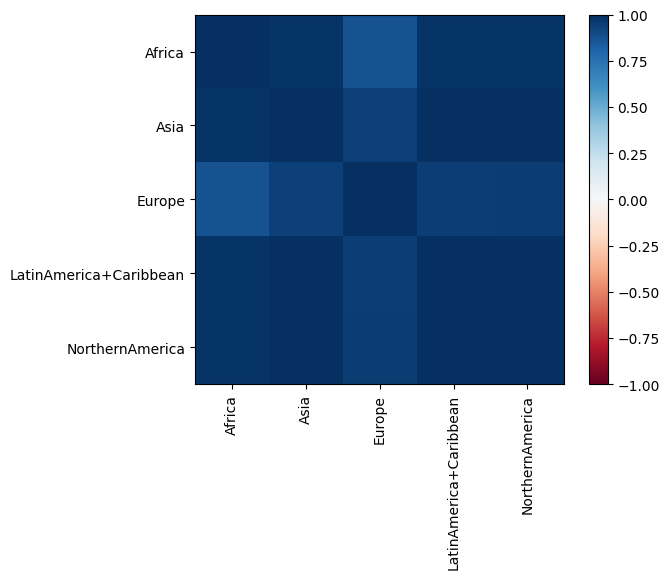

In [ ]:
#delete
plt.imshow(pops.T.corr(), clim=(-1,1), cmap="RdBu")
plt.colorbar()
plt.xticks(range(len(pops)), pops.index, rotation=90)
plt.yticks(range(len(pops)), pops.index);

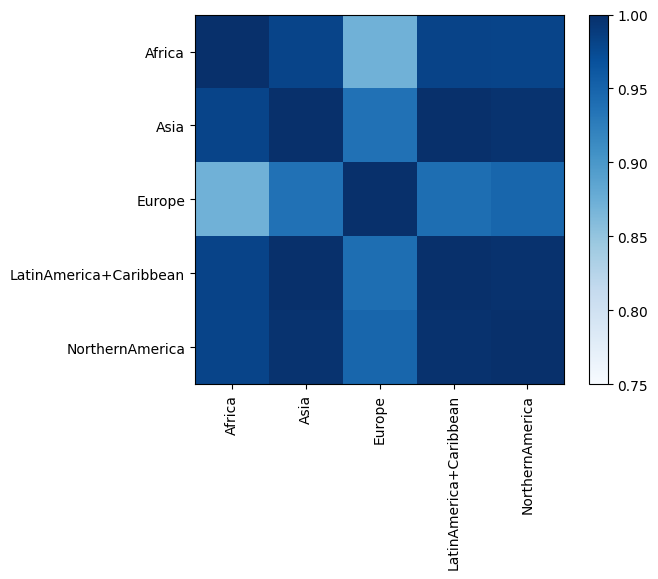

In [ ]:
#delete
plt.imshow(pops.T.corr(), clim=(0.75,1), cmap="Blues")
plt.colorbar()
plt.xticks(range(len(pops)), pops.index, rotation=90)
plt.yticks(range(len(pops)), pops.index);

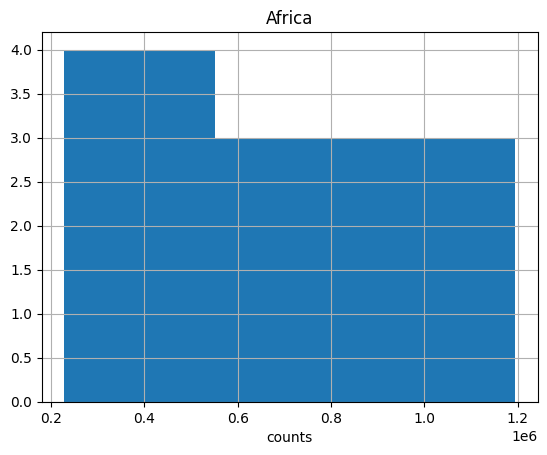

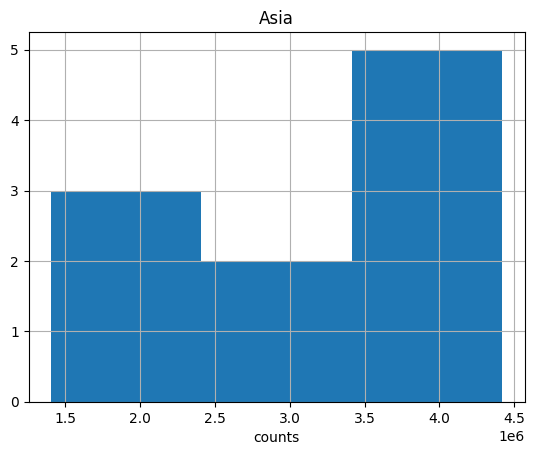

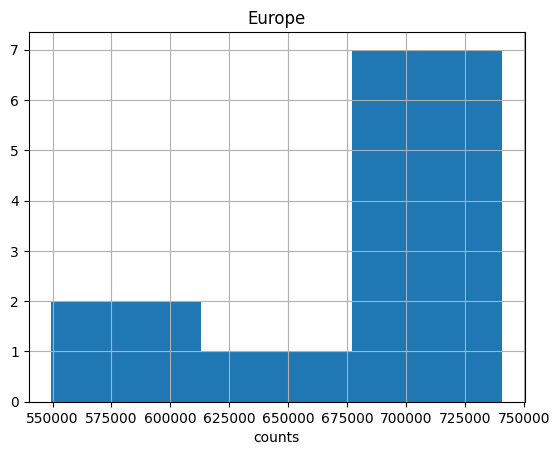

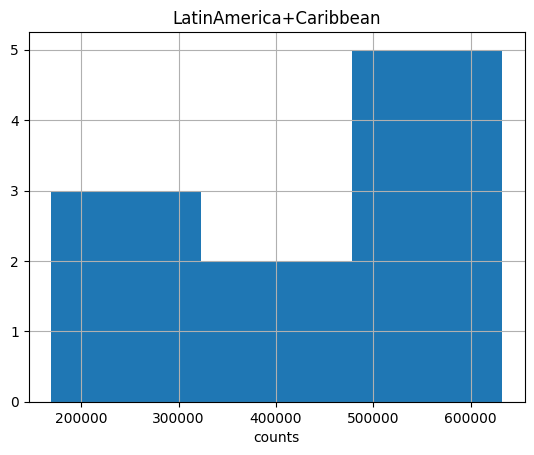

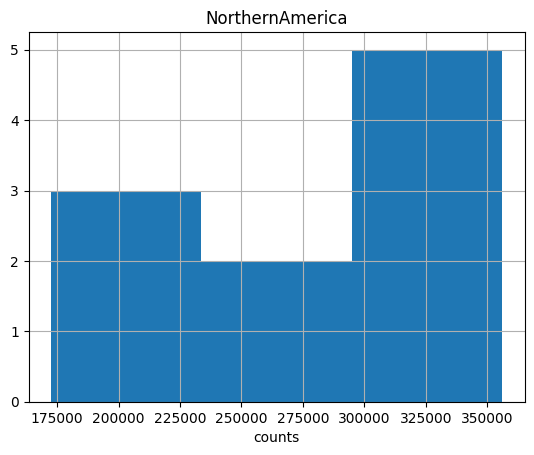

In [ ]:
#delete
for continent in pops.index:
  plt.figure()
  pops.loc[continent].hist(bins=3);
  plt.xlabel("population")
  plt.xlabel("counts")
  plt.title(continent);

# data visualization
make a line plot of population size vs time  for each continent, then normalize the data and make a visualization of the normalized continent population trends

**15 points**

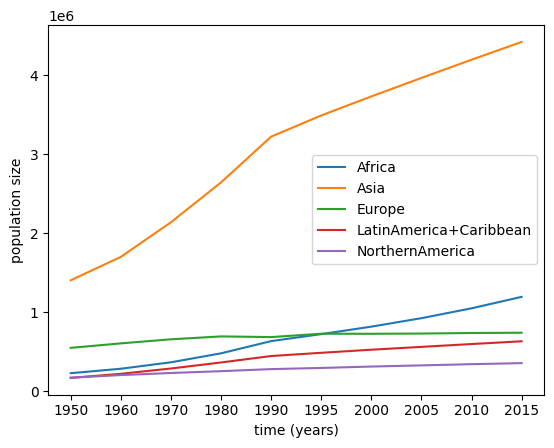

In [ ]:
#delete leave plot
for continent in pops.index:
  plt.plot(pops.columns, pops.loc[continent], label=continent)
plt.legend()
plt.xlabel("time (years)")
plt.ylabel("population size");

In [ ]:
# normalized population dataframe
pops_normalized = ((pops.T -  pops.T.mean(axis=0)) / pops.T.std(axis=0)).T
pops_normalized

,1950,1960,1970,1980,1990,1995,2000,2005,2010,2015
Region,,,,,,,,,,
Africa,-1.338074,-1.167008,-0.920680,-0.576702,-0.108520,0.159128,0.445826,0.770535,1.148243,1.587251
Asia,-1.582559,-1.304407,-0.893971,-0.420382,0.122830,0.374296,0.600518,0.820084,1.036000,1.247591
Europe,-2.124110,-1.242353,-0.440508,0.134186,0.000000,0.662429,0.648645,0.696811,0.803994,0.860906
LatinAmerica+Caribbean,-1.610012,-1.287599,-0.873080,-0.401782,0.103085,0.356301,0.597073,0.818854,1.040912,1.256248
NorthernAmerica,-1.724232,-1.196271,-0.764480,-0.383002,0.042117,0.284243,0.574930,0.815941,1.068265,1.282489


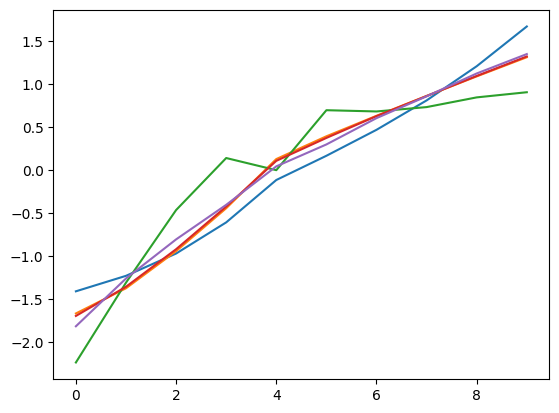

In [ ]:
from sklearn import preprocessing
plt.plot(preprocessing.scale (pops.T, axis=0))


In [ ]:
pops_normalized = ((pops.T -  pops.T.mean(axis=0)) / pops.std(axis=1).T).T


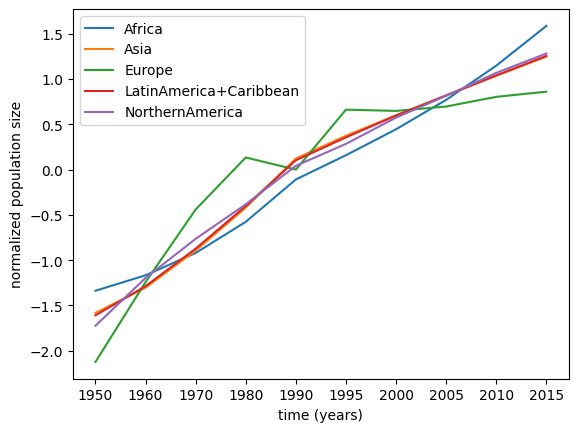

In [ ]:
# delete leave plot

for continent in pops.index:
  plt.plot(pops_normalized.columns, pops_normalized.loc[continent], label=continent)

plt.legend()
plt.xlabel("time (years)")
plt.ylabel("normalized population size");

# data analysis 1:

which continent has the smallest population in 1990? what is the population size for this continent now (in 2015)?

**5 points**

In [ ]:
#delete partial
print("continent with the smalles population in 1990 {}".format(
    pops[pops["1990"] == pops["1990"].min()].index[0]))

continent with the smalles population in 1990 NorthernAmerica


In [ ]:
#delete partial
print("current (2015) population of {}: {} people".format(
    pops[pops["1990"] == pops["1990"].min()].index[0],
    pops[pops["1990"] == pops["1990"].min()]["2015"].values[0]))

current (2015) population of NorthernAmerica: 356004 people


# data analysis 2a :
choose two continents (at least) and test the hypothesis that the population size trends are the same. That is, treating the continent's population as a sample from the world population over time, test if the two ontinents' population distribution comes from the same parent population _KS test tests exactly this hypothesis!_. Please look at hint 4! Write in full English the interpretation of the KS test reaults : "We can/cannot reject the null hypothesis that....."

**10 points**:

  



step 1: Null hypothesis: the continent data are taken from the same population

step 2: Alternative hypothesis: the continent data are not taken from the same population

step 3. p-value threshold : 0.05

In [ ]:
alpha = 0.05

In [ ]:
ks_result = sp.stats.ks_2samp(pops_normalized.loc["Asia"], pops_normalized.loc["Europe"])
ks_result

KstestResult(statistic=0.2, pvalue=0.9944575548290717, statistic_location=0.8039935728325616, statistic_sign=-1)

In [ ]:
if ks_result[1] < alpha:
  print("We can")
else:
  print("We cannot")
print("reject the null hypothesis that the continent populations are extracted from the same distribution at a p-value of", alpha)


We cannot
reject the null hypothesis that the continent populations are extracted from the same distribution at a p-value of 0.05


In [ ]:
# notice that if they do not use pops.normalize they would reject! and this is wrong
sp.stats.ks_2samp(pops.loc["Asia"], pops.loc["Europe"])

KstestResult(statistic=1.0, pvalue=1.0825088224469026e-05, statistic_location=740814.0, statistic_sign=-1)

#data analysis 6*b.*

fit a line to at least two continents. Based on the result of your fit, which continent has the fastest population growth?

**10 points**

In [ ]:
#delete
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(pops.columns.values.reshape(-1, 1),
                             pops.loc["Asia"].values)
slope_asia = reg.coef_[0]

In [ ]:
#delete
reg = LinearRegression().fit(pops.columns.values.reshape(-1, 1),
                             pops.loc["NorthernAmerica"].values)
slope_NA = reg.coef_[0]

In [ ]:
if slope_asia > slope_NA:
  print("the population growth is fastest in Asia")
else:
  print("the population growth is fastest in Northern America")

the population growth is fastest in Asia
